# Report without groud Truth v1.0

## Input prameters

In [ ]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from configparser import ConfigParser

pd.options.display.float_format = lambda x: '{:,.1e}'.format(x) if x>1e6 else '{:,.1f}'.format(x)

configFile='no_gt_report.config'
parser = ConfigParser()
parser.read(configFile)

prmNames=['run_id','h5_statistics','filtered_h5_statistics']

prm={}
for name in prmNames:
    prm[name]=parser.get('NOGTReport', name)


no_gt_statistics_unfiltered = parser.get('NOGTReport', 'h5_statistics', fallback='no_gt_statistics_unfiltered.h5')
no_gt_statistics_filtered = parser.get('NOGTReport', 'filtered_h5_statistics', fallback='no_gt_statistics_filtered.h5')

print(no_gt_statistics_unfiltered)
print(no_gt_statistics_filtered)

In [1]:
#%cd /data/mutect2/data_simulation/100x/170469/check_reporrt
!pwd


/home/ubuntu/Notebooks


In [2]:
!ls -ltr

total 1352236
drwxrwxr-x  3 ubuntu ubuntu      4096 Sep  3  2020  SOR
-rw-r--r--  1 ubuntu ubuntu       990 Sep 30 08:28  somatic_jsons
drwxrwxr-x  4 ubuntu ubuntu      4096 Oct  4 11:17  somatic_pipeline
-rw-rw-r--  1 ubuntu ubuntu    277654 Oct 13 11:42  Mutect.ipynb
drwxrwxr-x  2 ubuntu ubuntu      4096 Oct 15 05:26  mrd
-rw-rw-r--  1 ubuntu ubuntu        20 Oct 15 05:33 '~{valid_shards_log}'
-rw-rw-r--  1 ubuntu ubuntu     73580 Oct 15 05:33  bam_list_file
drwxrwxr-x 14 ubuntu ubuntu     12288 Oct 26 09:54  Interpretation_errors
-rw-rw-r--  1 ubuntu ubuntu    415921 Oct 28 13:57  mrd.ipynb
-rw-rw-r--  1 ubuntu ubuntu     11314 Nov  3 09:34 'Population variant calling.ipynb'
-rw-rw-r--  1 ubuntu ubuntu     73579 Nov  3 11:40  vcfeval_tunning.ipynb
-rw-rw-r--  1 ubuntu ubuntu    102543 Nov  4 12:30  maya_vcfeval_check.ipynb
-rw-rw-r--  1 ubuntu ubuntu    343292 Nov  8 10:55  vcfeval_check.ipynb
-rw-rw-r--  1 ubuntu ubuntu 614063543 Nov  8 14:41  h5_file_HG003_no_HG001_filtered_tlod.h

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from os.path import join as pjoin
from matplotlib.lines import Line2D
home=os.environ['HOME']
sys.path.append('/VariantCalling/src/')
from python.utils import revcomp


ModuleNotFoundError: No module named 'python'

In [6]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 26
TITLE_SIZE = 36
FIGSIZE = (16, 8)
GRID = True
COLORS = [
    "blue",
    "red",
    "green",
    "magenta",
    "black",
    "brown",
    "orange",
    "salmon",
    "teal",
    "coral",
    "lime",
    "purple",
    "cyan",
    "lavender",
    "turquoise",
    "darkgreen",
    "tan",
    "lightblue",
    "pink",
    "yellow",
    "gold",
]

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=TITLE_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc("axes", grid=GRID)  # is grid on
plt.rc("axes", prop_cycle=plt.cycler(color=COLORS))
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=TITLE_SIZE)  # fontsize of the figure title
plt.rc("figure", figsize=FIGSIZE)  # size of the figure

In [7]:

af_hist = pd.read_hdf(no_gt_statistics_unfiltered,'af_hist')
ins_del_hete = pd.read_hdf(no_gt_statistics_unfiltered,'ins_del_hete')
ins_del_homo = pd.read_hdf(no_gt_statistics_unfiltered,'ins_del_homo')
motifs = pd.read_hdf(no_gt_statistics_unfiltered,'snp_motifs')
#eval
CompOverlap = pd.read_hdf(no_gt_statistics_unfiltered,'eval_CompOverlap')
CountVariants = pd.read_hdf(no_gt_statistics_unfiltered,'eval_CountVariants')
TiTvVariantEvaluator = pd.read_hdf(no_gt_statistics_unfiltered,'eval_TiTvVariantEvaluator')
IndelLengthHistogram = pd.read_hdf(no_gt_statistics_unfiltered,'eval_IndelLengthHistogram')
IndelSummary = pd.read_hdf(no_gt_statistics_unfiltered,'eval_IndelSummary')
MetricsCollection = pd.read_hdf(no_gt_statistics_unfiltered,'eval_MetricsCollection')
ValidationReport = pd.read_hdf(no_gt_statistics_unfiltered,'eval_ValidationReport')
VariantSummary = pd.read_hdf(no_gt_statistics_unfiltered,'eval_VariantSummary')
MultiallelicSummary = pd.read_hdf(no_gt_statistics_unfiltered,'eval_MultiallelicSummary')

filtered_CompOverlap = pd.read_hdf(no_gt_statistics_filtered,'eval_CompOverlap')
filtered_CountVariants = pd.read_hdf(no_gt_statistics_filtered,'eval_CountVariants')
filtered_TiTvVariantEvaluator = pd.read_hdf(no_gt_statistics_filtered,'eval_TiTvVariantEvaluator')
filtered_IndelLengthHistogram = pd.read_hdf(no_gt_statistics_filtered,'eval_IndelLengthHistogram')
filtered_IndelSummary = pd.read_hdf(no_gt_statistics_filtered,'eval_IndelSummary')
filtered_MetricsCollection = pd.read_hdf(no_gt_statistics_filtered,'eval_MetricsCollection')
filtered_ValidationReport = pd.read_hdf(no_gt_statistics_filtered,'eval_ValidationReport')
filtered_VariantSummary = pd.read_hdf(no_gt_statistics_filtered,'eval_VariantSummary')
filtered_MultiallelicSummary = pd.read_hdf(no_gt_statistics_filtered,'eval_MultiallelicSummary')

In [8]:
#outplot_motif0 = pjoin(workdir, "motif0_bars.png")
#outplot_motif1 = pjoin(workdir, "motif1_plot.png")
#outplot_motif1_heatmap = pjoin(workdir, "motif1_heatmap.png")



## Allele Frequency histogram

No handles with labels found to put in legend.


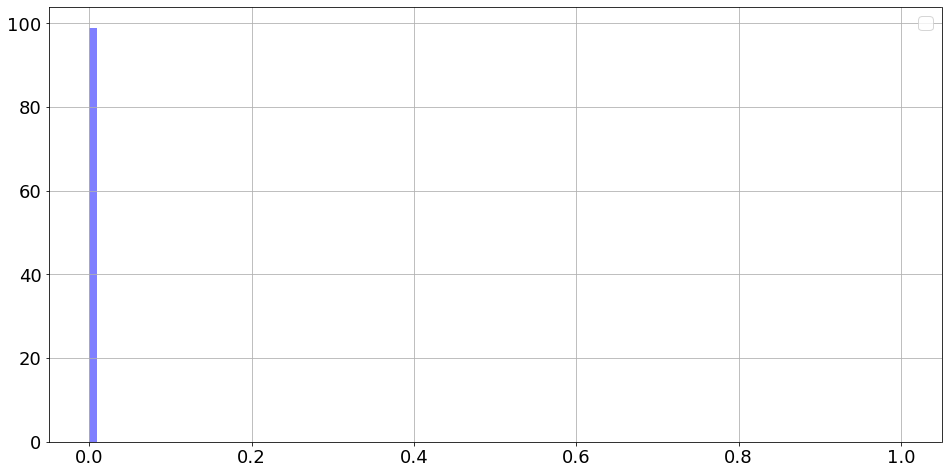

In [13]:


nbins = 100
bin_edges = pd.Series(np.linspace(0, 1, nbins))

for group in af_hist.columns:

    plt.hist(af_hist[group],bin_edges, alpha=0.5, label=group) ##???
    plt.legend(loc='upper right')
    
plt.show()


In [11]:
af_hist

,NaN
0,0
1,0
2,0
3,0
4,0
...,...
94,0
95,0
96,0
97,0


## Insertion Deletion Statistics

In [8]:
ins_del_hete.columns = pd.Series(ins_del_hete.columns).apply(lambda x: f"h-mer {x}")
ins_del_homo.columns = pd.Series(ins_del_homo.columns).apply(lambda x: f"h-mer {x}")

## Heterozygous

In [9]:
ins_del_hete

,h-mer 1,h-mer 2,h-mer 3,h-mer 4,h-mer 5,h-mer 6,h-mer 7,h-mer 8,h-mer 9,h-mer 10,h-mer 11,h-mer 12
ins A,834,1084,1038,2873,1932,956,834,273,159,94,66,0
ins G,9604,7240,4774,2683,882,107,22,2,2,2,1,0
del A,0,1502,321,1396,2206,893,827,626,355,315,83,193
del G,0,8225,2306,4894,3714,1242,237,27,3,4,0,1


## Homozygous

In [10]:
ins_del_homo

,h-mer 1,h-mer 2,h-mer 3,h-mer 4,h-mer 5,h-mer 6,h-mer 7,h-mer 8,h-mer 9,h-mer 10,h-mer 11,h-mer 12
ins A,0,0,0,0,0,0,0,0,0,0,0,0
ins G,0,0,0,0,0,0,0,0,0,0,0,0
del A,0,0,0,0,0,0,0,0,0,0,0,0
del G,0,0,0,0,0,0,0,0,0,0,0,0


# Snp statistics

In [11]:
motifs_0 = motifs.reset_index()
motifs_0 = (
    motifs_0.assign(ref=motifs_0["ref_motif"].str.slice(1, 2))
    .groupby(["ref", "alt_1"])
    .agg({"size": "sum"})
)["size"]
#motifs_0

NameError: name 'revcomp' is not defined

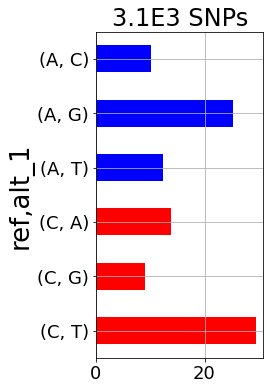

In [12]:

base_colors = {"A": "b", "C": "r", "T": "y", "G": "g"}
dpi = 150

def plot_motifs0_bars(ax=None):
    if ax is None:
        plt.figure(figsize=(3, 6))
        ax = plt.gca()
    plt.sca(ax)

    x = (motifs_0).sort_index(ascending=False)
    bbox_extra_artists = [
        plt.title(f"{x.sum():.1E} SNPs".replace("E+0", "E"), fontsize=24)
    ]
    (x / motifs_0.sum() * 100).plot.barh(
        color=[base_colors.get(v) for v in x.index.get_level_values("ref")],
        ax=ax,
    )
    plt.yticks(
        ticks=range(6),
        labels=[
            f"{ref}:{revcomp(ref)}->{alt}:{revcomp(alt)}" for ref, alt in x.index.values
        ],
    )
    for j, (_, row) in enumerate(x.to_frame().iterrows()):
        bbox_extra_artists += [
            plt.text(
                row["size"] / motifs_0.sum() * 101,
                j + 0.03,
                f"{row['size']:.1E}".replace("E+0", "E"),
            )
        ]
    plt.ylabel("")
    plt.xlabel("Frequency [%]")
    # plt.xlim(0, ax.get_xlim()[1]+0.1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return bbox_extra_artists


bbox_extra_artists = plot_motifs0_bars()

# plt.savefig(
#     outplot_motif0, dpi=dpi, bbox_inches="tight", bbox_extra_artists=bbox_extra_artists
# )

## Trinucleotide

NameError: name 'revcomp' is not defined

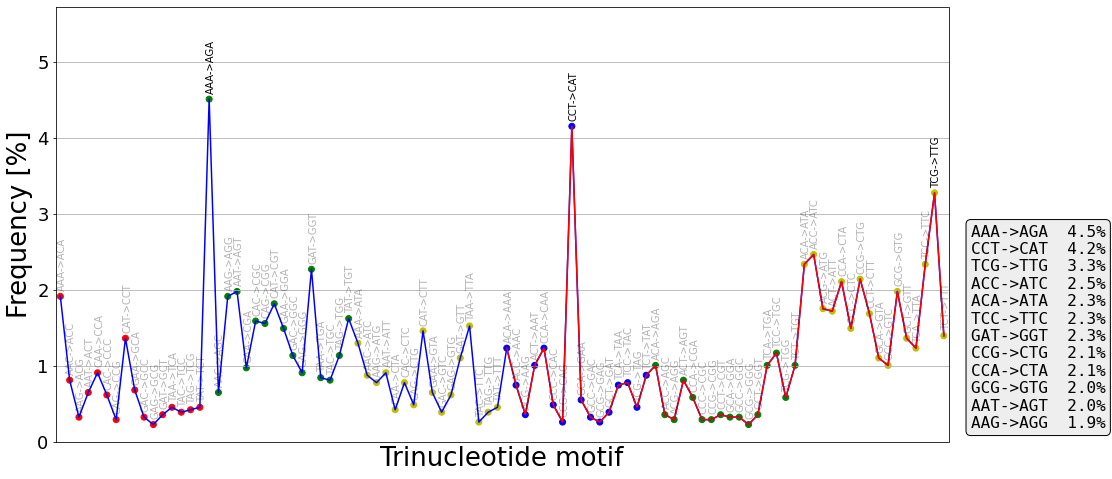

In [13]:
bbox_extra_artists = list()
x = (motifs / motifs.sum()).reset_index()
x = x.assign(
    ref=x["ref_motif"].str.slice(1, 2),
    alt_motif=x["ref_motif"].str.slice(0, 1) + x["alt_1"] + x["ref_motif"].str.slice(2),
)
x = x.sort_values(["ref", "alt_1"]).reset_index()
x["size"] *= 100
x["size"].plot(color="b")  # .query("ref == 'A'")
x.query("ref == 'C'")["size"].plot(color="r")
plt.scatter(
    x.index,
    x["size"],
    color=[base_colors.get(v) for v in x["alt_1"]],
    alpha=1,
)
plt.xlim(-0.5, 95.5)
plt.ylim(0, plt.gca().get_ylim()[1] + 1)
plt.xticks([])
bbox_extra_artists.append(plt.xlabel("Trinucleotide motif"))
bbox_extra_artists.append(plt.ylabel("Frequency [%]"))

th = x["size"].mean() + 2 * x["size"].std()
for ind, row in x.iterrows():
    plt.text(
        ind - 0.35,
        row["size"] + 0.1,
        f"{row['ref_motif']}->{row['alt_motif']}",
        rotation=90,
        fontsize=10,
        alpha=1 if row["size"] > th else 0.3,
    )

ax = plt.gca()
plt.rcParams["font.family"] = "monospace"
table_str = "\n".join(
    (
        x["ref_motif"]
        + "->"
        + x["alt_motif"]
        + "  "
        + (x["size"] / 100).apply(lambda x: f"{x:.1%}")
    )
    .loc[x.sort_values("size", ascending=False).head(12).index]
    .values
)
bbox_extra_artists.append(
    ax.text(
        1.025,
        0.5,
        table_str,
        transform=ax.transAxes,
        fontsize=16,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="#EEEEEE"),
    )
)
plt.rcParams["font.family"] = "sans-serif"

legend_elements = [
    Line2D([0], [0], color="b", lw=2, label="ref = A:T"),
    Line2D([0], [0], color="r", lw=2, label="ref = C:G"),
] + [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label=f"alt = {k}:{revcomp(k)}",
        markerfacecolor=v,
        markersize=10,
    )
    for k, v in base_colors.items()
]
bbox_extra_artists.append(plt.legend(handles=legend_elements, bbox_to_anchor=[1.01, 1]))



# Heatmap

NameError: name 'revcomp' is not defined

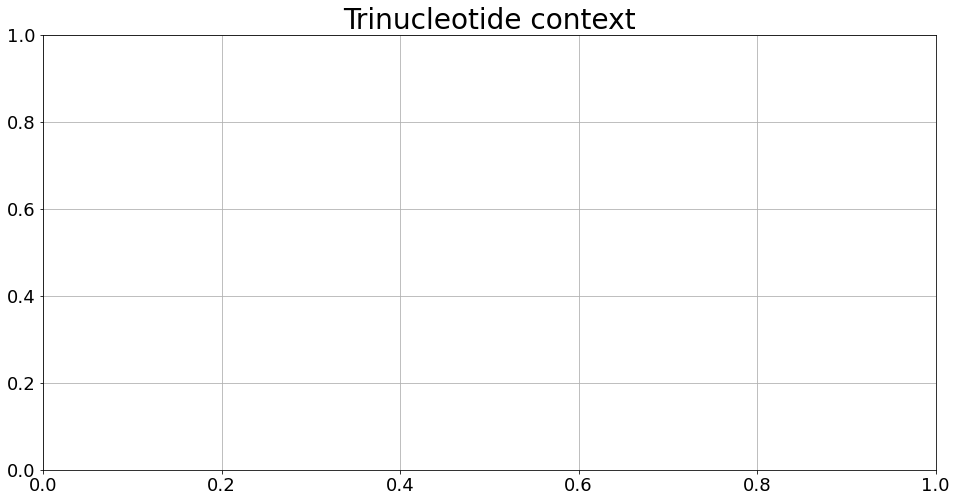

In [14]:
def plot_heatmap(motifs,ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    plt.sca(ax)

    plt.title("Trinucleotide context", fontsize=28)
    x = (motifs / motifs.sum()).reset_index()
    x = x.assign(
        ref=x["ref_motif"].str.slice(1, 2),
        alt_motif=x["ref_motif"].str.slice(0, 1)
        + x["alt_1"]
        + x["ref_motif"].str.slice(2),
        left=x["ref_motif"].str.slice(0, 1),
        right=x["ref_motif"].str.slice(2),
    )
    x = x.assign(
        family=x.apply(
            lambda y: f"{y['ref']}:{revcomp(y['ref'])}->{y['alt_1']}:{revcomp(y['alt_1'])}",
            axis=1,
        )
    )
    x = x.pivot_table(
        index=[
            "family",
            "left",
        ],
        columns=["right"],
        values="size",
    ).sort_index(ascending=False)

    bbox_extra_artists = list()
    data = np.concatenate((x.iloc[:12, :], x.iloc[12:, :]), axis=1) * 100
    plt.imshow(data, cmap="viridis")
    cbar = plt.colorbar()
    cbar.ax.get_yaxis().set_ticks(
        range(
            int(np.ceil(min(cbar.ax.get_yaxis().get_ticklocs()))),
            1 + int(max(cbar.ax.get_yaxis().get_ticklocs())),
        )
    )
    cbar.ax.set_ylabel("Frequency [%]", fontsize=24, rotation=270, labelpad=30)
    plt.xticks(range(8), list(x.columns) + list(x.columns))
    plt.yticks(range(12), x.iloc[:12, :].index.get_level_values("left"))
    plt.ylabel("Left base")
    plt.xlabel("Right base")
    plt.grid()
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plt.plot(np.ones(2) * (xlim[0] + (xlim[1] - xlim[0]) / 2), ylim, "-w", linewidth=2)
    plt.plot(xlim, np.ones(2) * (ylim[0] + (ylim[1] - ylim[0]) / 3), "-w", linewidth=2)
    plt.plot(
        xlim, np.ones(2) * (ylim[0] + (ylim[1] - ylim[0]) * 2 / 3), "-w", linewidth=2
    )

    X = np.repeat(
        [
            [
                (xlim[0] + (xlim[1] - xlim[0]) / 4),
                (xlim[0] + (xlim[1] - xlim[0]) * 3 / 4),
            ]
        ],
        3,
        axis=0,
    )
    Y = np.repeat(
        [
            [
                (ylim[0] + (ylim[1] - ylim[0]) * 5 / 6),
                (ylim[0] + (ylim[1] - ylim[0]) * 3 / 6),
                (ylim[0] + (ylim[1] - ylim[0]) / 6),
            ]
        ],
        2,
        axis=0,
    ).T
    T = np.vstack(
        (
            x.iloc[:12:4, :].index.get_level_values("family").values,
            x.iloc[12::4, :].index.get_level_values("family").values,
        )
    ).T

    for xx, yy, tt in zip(X.flatten(), Y.flatten(), T.flatten()):
        plt.text(xx, yy, tt, color="#BB5555", fontsize=28, ha="center", va="center")

plot_heatmap(motifs)


# Statistics tables from VariantEval

## CompOverlap

In [26]:
CompOverlap = CompOverlap.drop(["CompOverlap","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
CompOverlap.columns = pd.Series(CompOverlap.iloc[0])
unfiltered = CompOverlap[1::].loc[["nEvalVariants","novelSites"]]

filtered_CompOverlap = filtered_CompOverlap.drop(["CompOverlap","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
filtered_CompOverlap.columns = pd.Series(filtered_CompOverlap.iloc[0])
filtered = filtered_CompOverlap[1::].loc[["nEvalVariants","novelSites"]]
filtered.rename({"nEvalVariants": "filtered_nEvalVariants", "novelSites": "filtered_novelSites"}, axis='index',inplace=True)

unfiltered.append(filtered)
## concordantRate

Novelty,all,known,novel
nEvalVariants,3981,994,2987
novelSites,2987,0,2987
filtered_nEvalVariants,3981,994,2987
filtered_novelSites,2987,0,2987


## CountVariants

In [22]:
CountVariants = CountVariants.drop(["CountVariants","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
CountVariants.columns = pd.Series(CountVariants.iloc[0])
unfiltered = CountVariants[1::].loc[["nDeletions","nInsertions"]]

filtered_CountVariants = filtered_CountVariants.drop(["CountVariants","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
filtered_CountVariants.columns = pd.Series(filtered_CountVariants.iloc[0])
filtered = filtered_CountVariants[1::].loc[["nDeletions","nInsertions"]]
filtered.rename({"nDeletions": "filtered_nDeletions", "nInsertions": "filtered_nInsertions"}, axis='index',inplace=True)

unfiltered.append(filtered)

Novelty,all,known,novel
nDeletions,441,74,367
nInsertions,291,35,256
filtered_nDeletions,441,74,367
filtered_nInsertions,291,35,256


## TiTvVariantEvaluator

In [21]:
TiTvVariantEvaluator = TiTvVariantEvaluator.drop(["TiTvVariantEvaluator","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
TiTvVariantEvaluator.columns = pd.Series(TiTvVariantEvaluator.iloc[0])
unfiltered = TiTvVariantEvaluator[1::].loc[["nTi","nTv","TiTvRatioStandard"]]

filtered_TiTvVariantEvaluator = filtered_TiTvVariantEvaluator.drop(["TiTvVariantEvaluator","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
filtered_TiTvVariantEvaluator.columns = pd.Series(filtered_TiTvVariantEvaluator.iloc[0])
filtered = filtered_TiTvVariantEvaluator[1::].loc[["nTi","nTv","TiTvRatioStandard"]]
filtered.rename({"nTi": "filtered_nTi", "nTv": "filtered_nTv", "TiTvRatioStandard": "filtered_TiTvRatioStandard"}, axis='index',inplace=True)

unfiltered.append(filtered)

Novelty,all,known,novel
nTi,1654,536,1118
nTv,1343,301,1042
TiTvRatioStandard,2.00,1.90,2.00
filtered_nTi,1654,536,1118
filtered_nTv,1343,301,1042
filtered_TiTvRatioStandard,2.00,1.90,2.00


## IndelSummary

In [20]:
IndelSummary = IndelSummary.drop(["IndelSummary","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
IndelSummary.columns = pd.Series(IndelSummary.iloc[0])
unfiltered = IndelSummary[1::].loc[["indel_novelty_rate",
                       "SNP_het_to_hom_ratio",
                       "SNP_to_indel_ratio",
                       "SNP_het_to_hom_ratio",
                       "indel_het_to_hom_ratio"]]

filtered_IndelSummary = filtered_IndelSummary.drop(["IndelSummary","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
filtered_IndelSummary.columns = pd.Series(filtered_IndelSummary.iloc[0])
filtered = filtered_IndelSummary[1::].loc[["indel_novelty_rate",
                       "SNP_het_to_hom_ratio",
                       "SNP_to_indel_ratio",
                       "SNP_het_to_hom_ratio",
                       "indel_het_to_hom_ratio"]]

filtered.rename({"SNP_het_to_hom_ratio": "filtered_SNP_het_to_hom_ratio",
                 "SNP_to_indel_ratio": "filtered_SNP_to_indel_ratio",
                 "SNP_het_to_hom_ratio": "filtered_SNP_het_to_hom_ratio",
                 "indel_het_to_hom_ratio": "filtered_indel_het_to_hom_ratio"}, axis='index',inplace=True)
unfiltered.append(filtered)

Novelty,all,known,novel
indel_novelty_rate,81.14,0.00,100.00
SNP_het_to_hom_ratio,NA,NA,NA
SNP_to_indel_ratio,3.41,4.97,3.05
SNP_het_to_hom_ratio,NA,NA,NA
indel_het_to_hom_ratio,NA,NA,NA
indel_novelty_rate,81.14,0.00,100.00
filtered_SNP_het_to_hom_ratio,NA,NA,NA
filtered_SNP_to_indel_ratio,3.41,4.97,3.05
filtered_SNP_het_to_hom_ratio,NA,NA,NA
filtered_indel_het_to_hom_ratio,NA,NA,NA


## MultiallelicSummary

In [19]:
MultiallelicSummary = MultiallelicSummary.drop(["MultiallelicSummary","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
MultiallelicSummary.columns = pd.Series(MultiallelicSummary.iloc[0])
unfiltered = MultiallelicSummary[1::].loc[["nTi","nTv"]]

filtered_MultiallelicSummary = filtered_MultiallelicSummary.drop(["MultiallelicSummary",
                                                                  "CompFeatureInput",
                                                                  "EvalFeatureInput",
                                                                  "JexlExpression"], axis=1).transpose()
filtered_MultiallelicSummary.columns = pd.Series(filtered_MultiallelicSummary.iloc[0])
filtered = filtered_MultiallelicSummary[1::].loc[["nTi","nTv"]]
filtered.rename({"nTi": "filtered_nTi",
                 "nTv": "filtered_nTv"}, axis='index',inplace=True)
unfiltered.append(filtered)

Novelty,all,known,novel
nTi,59,11,48
nTv,113,21,92
filtered_nTi,59,11,48
filtered_nTv,113,21,92


## IndelLengthHistogram

In [91]:
IndelLengthHistogram

,IndelLengthHistogram,CompFeatureInput,EvalFeatureInput,JexlExpression,Novelty,Length,Freq
0,IndelLengthHistogram,dbsnp,eval,none,all,-10,0.04
1,IndelLengthHistogram,dbsnp,eval,none,all,-9,0.00
2,IndelLengthHistogram,dbsnp,eval,none,all,-8,0.00
3,IndelLengthHistogram,dbsnp,eval,none,all,-7,0.04
4,IndelLengthHistogram,dbsnp,eval,none,all,-6,0.02
5,IndelLengthHistogram,dbsnp,eval,none,all,-5,0.00
6,IndelLengthHistogram,dbsnp,eval,none,all,-4,0.09
7,IndelLengthHistogram,dbsnp,eval,none,all,-3,0.09
8,IndelLengthHistogram,dbsnp,eval,none,all,-2,0.13
9,IndelLengthHistogram,dbsnp,eval,none,all,-1,0.21


<!--  ## MetricsCollection -->

In [92]:
# MetricsCollection = MetricsCollection.drop(["MetricsCollection","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
# MetricsCollection.columns = pd.Series(MetricsCollection.iloc[0])
# MetricsCollection[1::]

<!-- ## ValidationReport -->

In [93]:
# ValidationReport = ValidationReport.drop(["ValidationReport","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
# ValidationReport.columns = pd.Series(ValidationReport.iloc[0])
# ValidationReport[1::]

<!--  ## VariantSummary -->

In [94]:
# VariantSummary = VariantSummary.drop(["VariantSummary","CompFeatureInput","EvalFeatureInput","JexlExpression"], axis=1).transpose()
# VariantSummary.columns = pd.Series(VariantSummary.iloc[0])
# VariantSummary[1::]